Using Numpy to do Bayesian Linear Regression - remove the pymc magic curtain 

In [1]:
import numpy as np
import matplotlib.pyplot as plt     

from PIL import Image


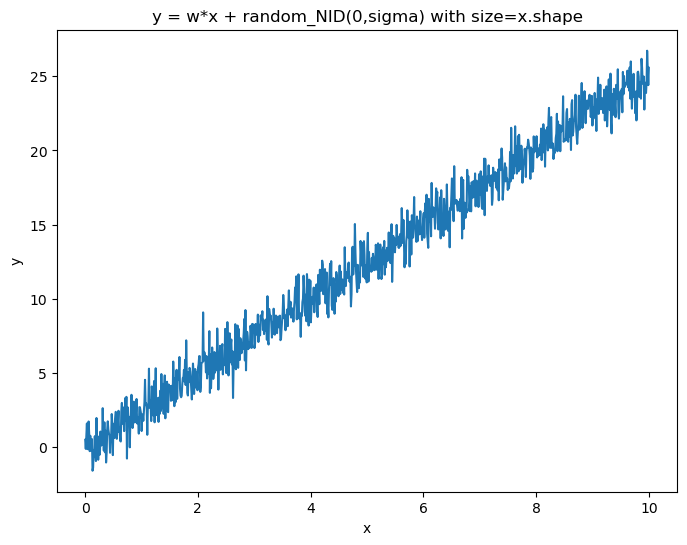

In [2]:
np.random.seed(42) # reproducibility 

# true parameters
true_w = 2.5
sigma = 1.0

# generate inputs

x = np.linspace(0,10,1000)
y = true_w * x + np.random.normal(0, sigma, size=x.shape)

plt.figure(figsize=(8,6))
plt.plot(x,y)
plt.title('y = w*x + random_NID(0,sigma) with size=x.shape')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

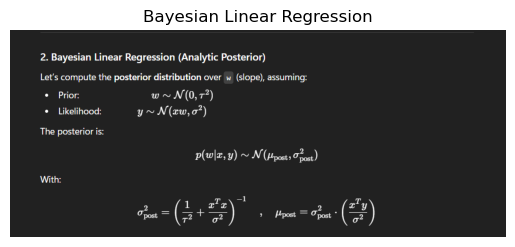

In [3]:
image = Image.open(r'D:\Dropbox\1e_Bayesian_Analysis\Bayesian-Analysis\bayes_linear_regression.png')

plt.imshow(image)
plt.axis('off')
plt.title('Bayesian Linear Regression')
plt.show()

In [4]:
# prior variance
tau2 = 10.0 # weak prior

# likelihood variance 
sigma2 = sigma*2

# compute posterior variance 
X = x.reshape(-1,1) # column vector

XtX = np.sum(X**2)

print('x shape (one dim): ',x.shape)
print('X shape (two dim): ',X.shape)

sigma2_post = 1 / (1 / tau2 + XtX / sigma2)  # scalar
mu_post = sigma2_post * np.sum(x*y)/sigma2 # scalar

print('sigma sqr post :', sigma2_post) 
print('mu post :', mu_post)

x shape (one dim):  (1000,)
X shape (two dim):  (1000, 1)
sigma sqr post : 5.996962535474299e-05
mu post : 2.505892438530066


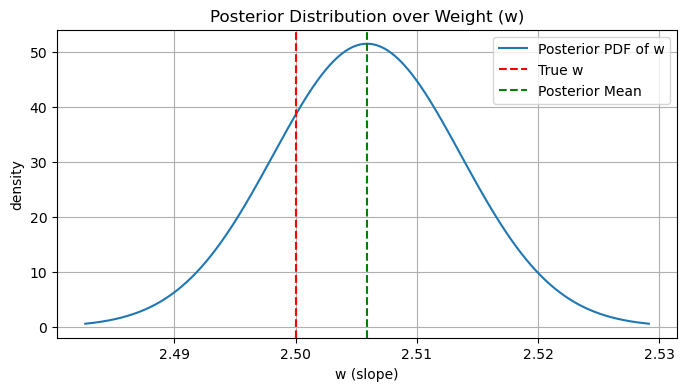

In [5]:
# w_vals = np.linspace(mu_post - 3*np.sqrt(sigma2_post), mu_post + 3*np.sqrt(sigma2_post), 100)
# posterior_pdf = (1 / np.sqrt(2 * np.pi * sigma2_post)) * np.exp(-0.5 * ((w_vals - mu_post)**2) / sigma2_post)

# x-axis values 
w_vals = np.linspace(mu_post - 3*np.sqrt(sigma2_post), mu_post + 3*np.sqrt(sigma2_post), 1000)

# using normal dist. equn for PDF to create y-axis values 
posterior_pdf = (1 / np.sqrt(2 * np.pi * sigma2_post)) * np.exp(-0.5 * ((w_vals - mu_post)**2) / sigma2_post)

plt.figure(figsize=(8,4))
plt.plot(w_vals,posterior_pdf, label="Posterior PDF of w")
plt.axvline(true_w, color='r', linestyle='--', label='True w')
plt.axvline(mu_post, color='g', linestyle='--', label='Posterior Mean')
plt.xlabel('w (slope)')
plt.ylabel('density')
plt.title('Posterior Distribution over Weight (w)')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
data = np.random.normal(100,10,18)
n = len(data)

true_mean = np.mean(data)
std_dev = np.std(data,ddof=1)
se_mean = std_dev / np.sqrt(n)
print(f'se_mean {se_mean:3.4f}')

se_std_dev = std_dev / np.sqrt(2 * (n-1))

se_mean 2.0336


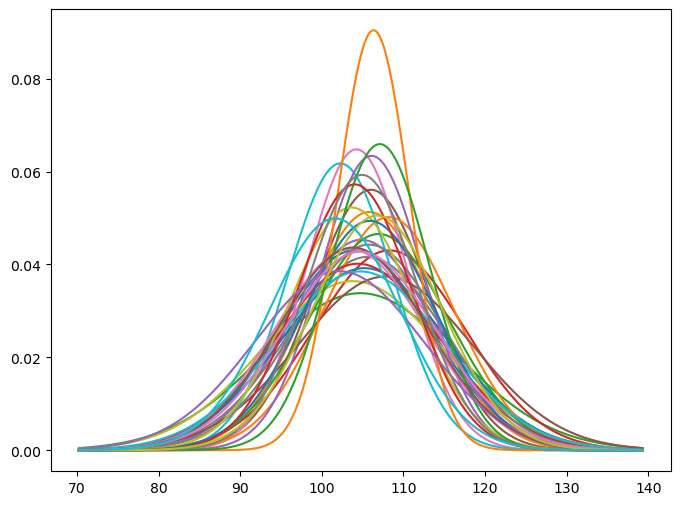

In [7]:
from scipy.stats import norm

sample_size = 30
x = np.linspace(true_mean-4*std_dev, true_mean+4*std_dev,1000)

memory = np.zeros(sample_size)

plt.figure(figsize=(8,6))
for i in range(sample_size):
    sample_mean = np.random.normal(true_mean,se_mean)
    sample_std = np.abs(np.random.normal(std_dev,se_std_dev))
    memory[i] = sample_mean
    pdf = norm.pdf(x, loc=sample_mean, scale=sample_std)
    plt.plot(x,pdf)
plt.show()

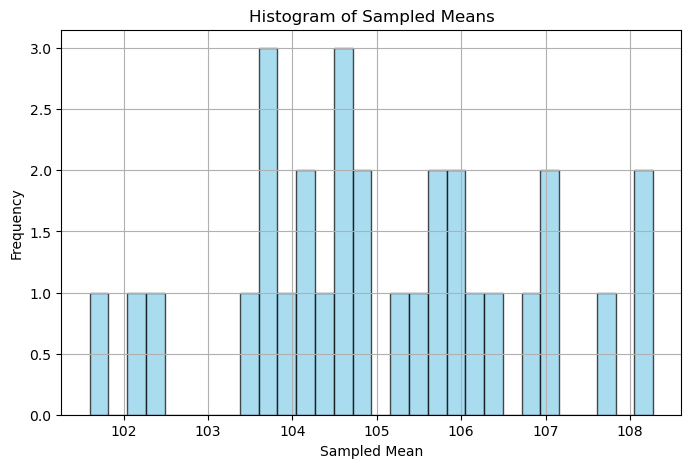

In [8]:
plt.figure(figsize=(8, 5))
plt.hist(memory, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Histogram of Sampled Means")
plt.xlabel("Sampled Mean")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

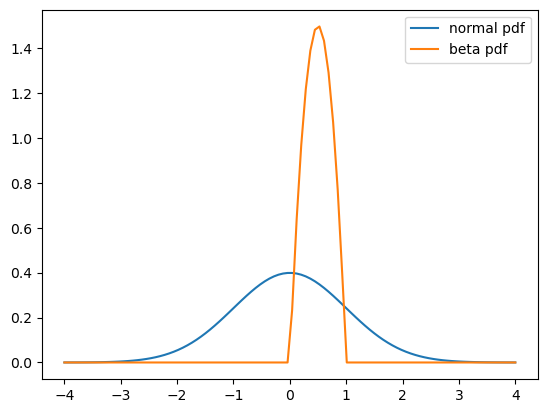

In [9]:
from scipy.stats import beta, Binomial, norm
import numpy as np

x = np.linspace(-4,4,100)
a,b = 2,2

norm_pdf = norm.pdf(x)
beta_pdf = beta.pdf(x,a,b)

plt.figure()
plt.plot(x,norm_pdf, label='normal pdf')
plt.plot(x,beta_pdf,label='beta pdf')
plt.legend()
plt.show()

In [10]:
import pandas as pd

bike_data = pd.read_csv(r'D:\Dropbox\1e_Bayesian_Analysis\bike_sharing\day.csv')

bike_data.head()


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\derek\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\derek\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Users\derek\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "c:\Users\derek\anaconda3\Lib\site-pack

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.




A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\derek\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\derek\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Users\derek\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "c:\Users\derek\anaconda3\Lib\site-pack

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.




A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\derek\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\derek\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Users\derek\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "c:\Users\derek\anaconda3\Lib\site-pack

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [11]:
import pandas as pd 
